# Assignment 4
### Do three of six.

Helen Corbat 

Chloe Barnes 

Sabine Segaloff

TianYin Mao

Aysha Hussen

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Owner\\OneDrive\\MSDS 2025\\DS5030_Understanding Uncertainty\\data\\mn_police_use_of_force.csv")
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [3]:
df['injury_na'] = df['subject_injury'].isna()
df['injury_na'].value_counts()

injury_na
True     9848
False    3077
Name: count, dtype: int64

In [4]:
df['race'].value_counts()

race
Black                 7648
White                 3129
Native American        784
Other / Mixed Race     205
Asian                  129
Pacific Islander         6
Name: count, dtype: int64

In [5]:
pd.crosstab(df['injury_na'], df['race'],normalize='columns')

race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,White
injury_na,,,,,,
False,0.364341,0.240847,0.280612,0.590244,0.0,0.246405
True,0.635659,0.759153,0.719388,0.409756,1.0,0.753595


C:\Users\Owner\AppData\Local\Temp\ipykernel_26948\2618594040.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df,x = var, ax = axes[0],hue = conditioner).set(title='KDE of Underlying Data')
C:\Users\Owner\AppData\Local\Temp\ipykernel_26948\2618594040.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')


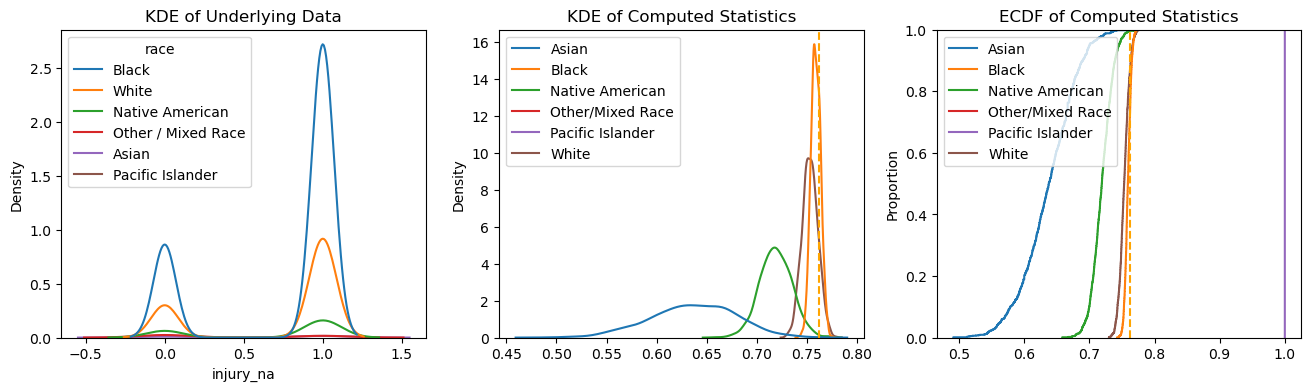

Variance of estimates is: Asian               0.001791
Black               0.000023
Native American     0.000256
Other/Mixed Race         NaN
Pacific Islander    0.000000
White               0.000061
dtype: float64


c:\Users\Owner\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [9]:
def stat(x):
    stat = np.mean(x)
    return stat
def simulate(var, df, fcn, conditioner,S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var]

    estimates = {'Asian':[],'Black': [], 'Native American':[],'Other/Mixed Race':[],'Pacific Islander':[],'White':[]}
    for s in range(S):
        for race in ['Asian','Black','Native American','Other/Mixed Race','Pacific Islander','White']:  
        # Draw a new sample, with replacement:
            df_s = df.sample(frac=1.0,replace=True,axis = 0)
        # Compute statistic:
            x_s = df_s[var].loc[df_s[conditioner]== race]
            stat_s = fcn(x_s)
        # Append estimate:
            estimates[race].append(stat_s)
    estimates = pd.DataFrame(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(df,x = var, ax = axes[0],hue = conditioner).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

var = 'injury_na'
conditioner = 'race'
estimates = simulate(var, df, stat,conditioner)

From the KDE & ECDF plots above, for the races of black, pacific islander, and white are really overlapping each other, and I don't see a huge a difference. However, for the races of Asian and Native Americans, the data does present some obvious difference even when considering the second order uncertainty.


### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data
- Use the above function `simulate` to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [13]:
def simulate2(var, df, fcn, S=1000, plot=True):      
    ''' Bootstrap simulation code. '''    
    x = df[var]     # x is a panda series from df

    estimates = []  # creating an empty list to hold bootstrap estimates
    for s in range(S):
        # Draw a new sample, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

In [ ]:
def stat(x):
    return x.std()


In [11]:
df_college= pd.read_csv('C:\\Users\\Owner\\OneDrive\\MSDS 2025\\DS5030_Understanding Uncertainty\\Assignments\\data\\college_completion.csv')

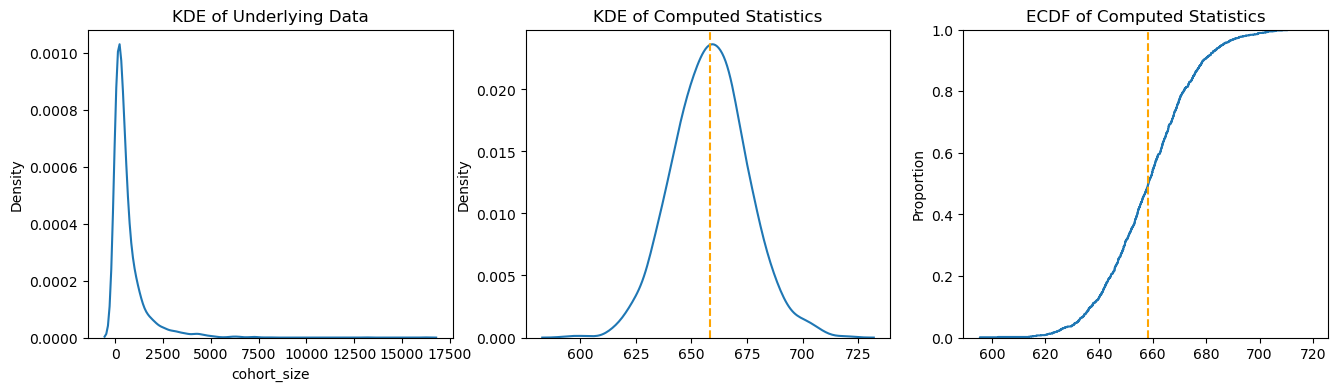

Variance of estimates is: 280.93260100361124


In [14]:
var = 'cohort_size'
estimates = simulate2(var,df_college,stat)

In [16]:
def interval(L,H, estimates):
    lth = np.quantile(estimates,L)
    hth = np.quantile(estimates, H)
    return lth,hth

lth,hth = interval(0.05,0.95,estimates)
print(f'Lower: {lth},Upper:{hth}')



Lower: 631.9740693903717,Upper:685.984342090353


### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

The goal of the trial is to compare two heart disease treatments or strategies that one is called invasive strategy which is composed of cardiac catheterization followed by revascularization plus optimal medical therapy, and the other is called a conservative strategy.

From the study plan, it indicates that the study was designed using randomization to avoid sample bias. Random assignment is the highest chance that both groups are representative to the population.

overallnumberparticipants (Invasive) = 388
incidentofdeath = 123 (31.7%)
overallnumberparticipants (conservative) =389
incidentofdeath = 129 (33.2%)

The survival rate of the invasive strategy is 100%-31.7% = 68.3%, and for the conservative strategy is 100% - 33.2% = 66.8%.
Therefore, the difference in survival rates between those two are 68.3%-66.8% = 1.5%.


Reason why?
Because patients with CKD are ofen excluded from heart disease trials due to risks such as contrast-induced kidney injury, the trial directly addressed the clinical uncertainty "equipoise" about whether invasive procedures actually help these high-risk groups.

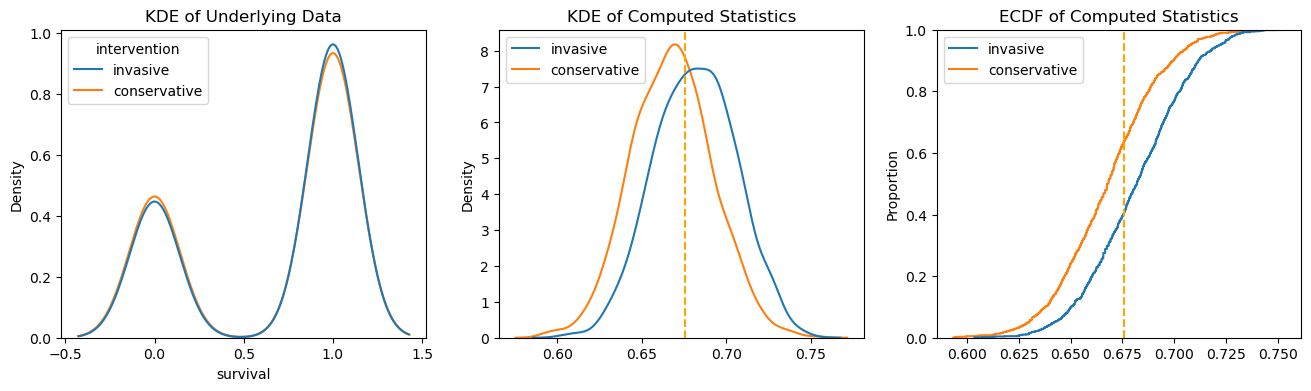

Variance of estimates is: invasive        0.000573
conservative    0.000578
dtype: float64


c:\Users\Owner\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
def stat(x):
    return x.mean()
def simulate(var, df, fcn, conditioner,S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var]

    estimates = {'invasive':[],'conservative': []}
    for s in range(S):
        for treatment in ['invasive','conservative']:  
        # Draw a new sample, with replacement:
            df_s = df.sample(frac=1.0,replace=True,axis = 0)
        # Compute statistic:
            x_s = df_s[var].loc[df_s[conditioner]== treatment]
            stat_s = fcn(x_s)
        # Append estimate:
            estimates[treatment].append(stat_s)
    estimates = pd.DataFrame(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(df,x = var, ax = axes[0],hue = conditioner).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates
survival = np.repeat([0,1,0,1],[123,265,129,260])
intervention = np.repeat(['invasive','conservative'],[388,389])
df3 = pd.DataFrame ({'survival': survival,'intervention': intervention})
estimates = simulate('survival',df3,stat,'intervention')


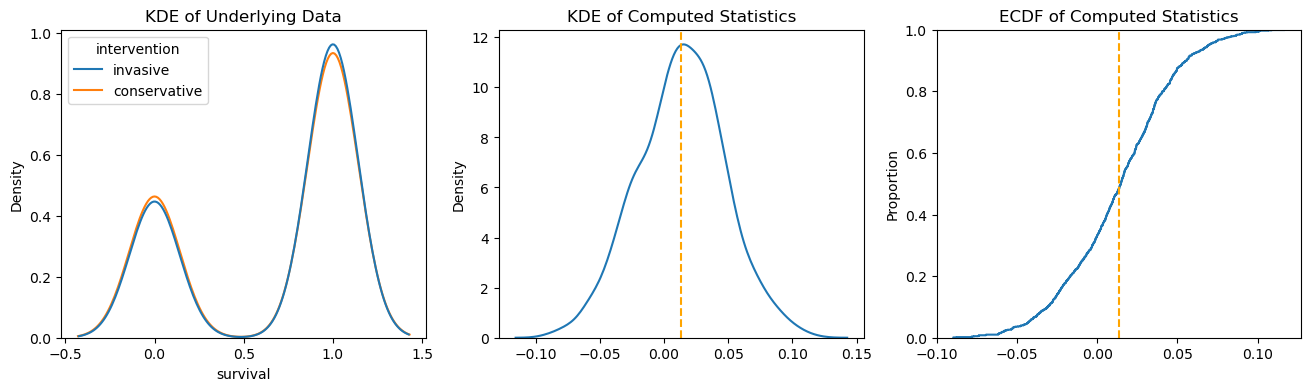

In [23]:
def stat(x):
    return x.mean()
def simulate(var, df, fcn, conditioner,S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var]
    estimates = {'invasive':[],'conservative': []}
    for s in range(S):
        for treatment in ['invasive','conservative']:  
        # Draw a new sample, with replacement:
            df_s = df.sample(frac=1.0,replace=True,axis = 0)
        # Compute statistic:
            x_s = df_s[var].loc[df_s[conditioner]== treatment]
            stat_s = fcn(x_s)
        # Append estimate:
            estimates[treatment].append(stat_s)
    difference = np.array(estimates['invasive']) - np.array(estimates['conservative'])

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(df,x = var, ax = axes[0],hue = conditioner).set(title='KDE of Underlying Data')
        sns.kdeplot(difference, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(difference), color='orange', linestyle='--')
        sns.ecdfplot(difference, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(difference), color='orange', linestyle='--')
        plt.show()
        
    return estimates
survival = np.repeat([0,1,0,1],[123,265,129,260])
intervention = np.repeat(['invasive','conservative'],[388,389])
df3 = pd.DataFrame ({'survival': survival,'intervention': intervention})
estimates = simulate('survival',df3,stat,'intervention')

There is no apparent difference between the two strategies at all. Invasive strategy did not show significance that it is more effective than the conservative.

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

### Exercise 5
- Extend the `kde` class by adding a method to do bandwidth selection using a simple train-test split
- Extend the `kde` class by adding a method to do bandwidth seleciton by $k$-fold cross validation

### Exercise 6
In this exercise, you're going to do for LCLS what we just did for KDE: Pick the bandwidth 

Recall, the LCLS estimator is
$$
\hat{y}_{N,h}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}.
$$
- Select two numeric variables from a data set. Split the data into training and test sets.
- Write a `predict(X_{train},Y_{train},X_{train})` function/method that takes a set of values $X_{test}$ and data $(X_{train},Y_{train})$, and computed predicted values $\hat{y}(X_{test})$ 
- Write a function/method that selects the bandwidth by **minimizing** the **mean squared error** of the squared differences between $\hat{y}(x_j)$ and $y_j$ on the test set:
$$
MSE(h) = \frac{1}{N_{test}} \sum_{j=1}^{N_{test}} (y_j - \hat{y}_{N_{train},h}(x_j))^2
$$
Be sure you understand what's happening here: The training data are used to make predictions for each test observation $x_j$, and then the prediction $\hat{y}(x_j)$ and true value $y_j$ are compared using squared difference